# SIR Modeling
SIR Modeling is a simple form of [compartmental modeling](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology). From the wikipedia page, 

> Compartmental models are a very general modelling technique. They are often applied to the mathematical modelling of infectious diseases. The population is assigned to compartments with labels – for example, S, I, or R, (Susceptible, Infectious, or Recovered). People may progress between compartments. The order of the labels usually shows the flow patterns between the compartments; for example SEIS means susceptible, exposed, infectious, then susceptible again. The models are most often run with ordinary differential equations (which are **deterministic**), but can also be used with a **stochastic** (random) framework, which is more realistic but much more complicated to analyze.

The three compartments are, 

* **S** - Susceptible individuals. Interactions with Infected result in individuals moving from S->I. 
* **I** - Infected individuals. Transitions from I->R due to either death or due to the disease running its course and taking the individual out of the S and I compartments.
* **R** - Recovered / Removed / Resistant

<br />

It is helpful to draw out diagrams of the different compartments in order to derive the differential equations (and initial conditions) governing SIR. Here is a link to a [Figma diagram]() to help us draw out our compartments. The resulting **initial-value problem** is as follows, 


<br />

$$
\begin{align}
\frac{\partial S}{\partial t} &= - \beta \cdot I \cdot S && S(0) = S_0 \\ \\
\frac{\partial I}{\partial t} &= \beta \cdot I \cdot S - \gamma \cdot I && I(0) = I_0 \\ \\ 
\frac{\partial R}{\partial t} &=  \gamma \cdot I && R(0) = R_0 \\ \\ 
\end{align}
$$

<br />

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

### % Population

In [78]:
I_0 = 0.001
S_0 = 1 - I
R_0 = 0

N = I_0 + S_0 + R_0
assert N == 1

### Interpreting time & coefficients
<br />

| Variable      | Description |
|:--------------|:------------|
| "t" or "time" | Non-specific (e.g. hours, days, years, etc). We associate this with simulation steps. |
| disease_duration | The number of simulation steps (e.g. "time") an individual is infected. |
| gamma | Coefficient for rate of recovery which is inversely proportional to `disease_duration` | 


<br />

In [79]:
disease_duration = 10 

gamma = 1 / duration


num_contacts = 15
prob_trans = 0.03
duration = 10

beta = num_contacts * prob_trans

r_0 = beta / gamma
r_0

4.499999999999999

In [ ]:
size = 100_000

$R_0$

In [74]:
def SIR():

    t = np.linspace(0, size / 1000.0, size)

    dt = t[1] - t[0]
    
    S = np.zeros(size)
    S[0] = S_0

    I = np.zeros(size)
    I[0] = I_0
    
    R = np.zeros(size)
    R[0] = R_0

    for n in range(0, size - 1):
        
        dS = -beta * I[n] * S [n]
        S[n+1] = S[n] + (dS * dt)
        
        dI = beta * I[n] * S[n] - gamma * I[n]
        I[n+1] = I[n] + (dI * dt)
        
        dR = gamma * I[n]
        R[n+1] = R[n] + (dR * dt)
        
    return pd.DataFrame({'susceptible': S, 'infected': I, 'recovered': R, 'time': t})

In [75]:
df = SIR()

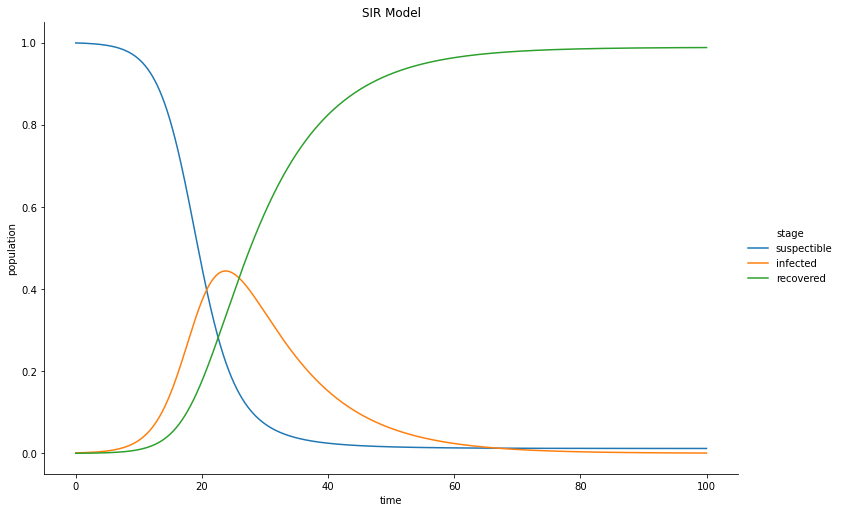

In [76]:
line = sns.relplot(
    data=pd.melt(df, id_vars=['time'], value_name='population', var_name='stage'),
    x='time',
    y='population',
    hue='stage',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="SIR Model"
)